In [1]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
from app.config import get_config, update_config

2025-07-22 15:36:12.009672: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-22 15:36:12.231438: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-22 15:36:12.526898: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-22 15:36:12.868078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753187773.187021    9301 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753187773.25

In [2]:
#### Plot the train files of the pronostia dataset!
SETUP = "XJTU_SY"        # "pronostia or XJTU_SY"
Local = True                # True=local, False=remote

if not Local:
    os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
    os.environ["CUDA_VISIBLE_DEVICES"] = "0"
    os.environ["NUMEXPR_MAX_THREADS"] = "32"
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

# Get the base config for the chosen setup
cfg = get_config(setup_name=SETUP, Local=Local)

# Apply dynamic update immediately
# Apply dynamic update immediately
update_config(cfg, bearing_used='Bearing1')
files_path = cfg.PICKLE_DATA_DIR

# Find all matching pickle files first
file_list = sorted(files_path.glob('Bearing*.pkl'))
num_files = len(file_list)
print(f"Found {num_files} files.")

# if num_files == 0:
#     print("No files found.")
# else:
#     fig, axs = plt.subplots(num_files, 2, figsize=(10, 2*num_files), sharex='col')
# 
#     # Make sure axs is always 2D
#     if num_files == 1:
#         axs = [axs]
# 
#     for i, file_path in enumerate(file_list):
#         with file_path.open('rb') as f:
#             df = pickle.load(f)
# 
#         # OPTIONAL: Downsample to speed up plotting
#         df_sampled = df.iloc[::150, :]  # every 10th row; adjust if needed
# 
#         # Plot horizontal
#         axs[i][0].plot(range(len(df_sampled['Horiz. accel.'])), df_sampled['Horiz. accel.'], color='tab:blue', lw=0.7)
#         axs[i][0].set_ylabel('Horiz. accel.')
#         axs[i][0].set_title(f"{file_path.name[:10]} - Horizontal")
# 
#         # Plot vertical
#         axs[i][1].plot(range(len(df_sampled['Vert. accel.'])), df_sampled['Vert. accel.'], color='tab:orange', lw=0.7)
#         axs[i][1].set_ylabel('Vert. accel.')
#         axs[i][1].set_title(f"{file_path.name[:10]} - Vertical")
# 
#     plt.tight_layout()
#     plt.show()

Found 15 files.


In [3]:
#### Load one file and inspect!! #####

# Collect all .pkl files into a sorted list
pkl_files = sorted(files_path.rglob('*.pkl'))

# Print the total number and list of file names
print(f"Total .pkl files found: {len(pkl_files)}")
for idx, file in enumerate(pkl_files):
    print(f"{idx}: {file.name}")

# Choose the nth file
n = 14
if n < len(pkl_files):
    selected_file = pkl_files[n]
    with selected_file.open('rb') as f:
        data = pickle.load(f)
    print(f"\nLoaded file #{n}: {selected_file.name}")
else:
    print(f"Index {n} is out of range. Only {len(pkl_files)} files found.")

print(type(data))
print(data.head())
print(data.columns)

Total .pkl files found: 15
0: Bearing1_1_DF.pkl
1: Bearing1_2_DF.pkl
2: Bearing1_3_DF.pkl
3: Bearing1_4_DF.pkl
4: Bearing1_5_DF.pkl
5: Bearing2_1_DF.pkl
6: Bearing2_2_DF.pkl
7: Bearing2_3_DF.pkl
8: Bearing2_4_DF.pkl
9: Bearing2_5_DF.pkl
10: Bearing3_1_DF.pkl
11: Bearing3_2_DF.pkl
12: Bearing3_3_DF.pkl
13: Bearing3_4_DF.pkl
14: Bearing3_5_DF.pkl

Loaded file #14: Bearing3_5_DF.pkl
<class 'pandas.core.frame.DataFrame'>
         Horiz. accel.        Vert. accel.
0   0.8136749267578125  0.4877686873078346
1   1.2944340705871582  0.8085966110229492
2  -0.8913516998291016  1.7830133438110352
3  0.22597309201955795   1.619577407836914
4   0.4910587891936302  1.2433171272277832
Index(['Horiz. accel.', 'Vert. accel.'], dtype='object')


In [5]:
############## Plot raw signals of a single bearing!!!!#############
def plot_signals(df, title=None):
    fig, axs = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
    axs[0].plot(range(len(df['Horiz. accel.'])), df['Horiz. accel.'], color='tab:blue')
    axs[0].set_ylabel('Horizontal Accel.')
    axs[0].set_title(title or 'Horizontal and Vertical Acceleration vs Time')
    axs[1].plot(range(len(df['Vert. accel.'])), df['Vert. accel.'], color='tab:orange')
    axs[1].set_ylabel('Vertical Accel.')
    axs[1].set_xlabel('Time')
    plt.tight_layout()
    plt.show()

In [ ]:
###### Plot raw signals from the first file ######
data = data.iloc[::500, :]  # every 10th row; adjust if needed
plot_signals(data, title='Single Bearing Time Series Data')

In [4]:
# Path to folder containing mel spectrogram .npy files!
mel_folder = cfg.FEATURE_DIR 

# List all .npy files
mel_files = sorted([f for f in os.listdir(mel_folder) if f.endswith('128.npy')])

print(f"Found {len(mel_files)} mel spectrogram files.")

Found 15 mel spectrogram files.


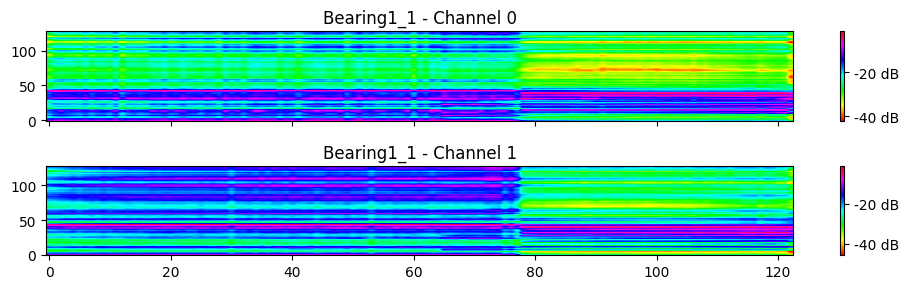

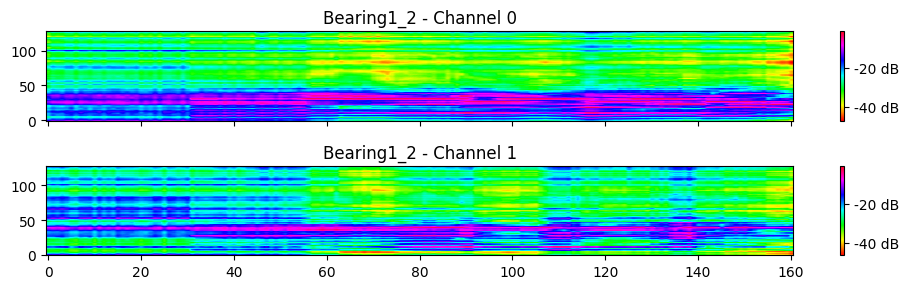

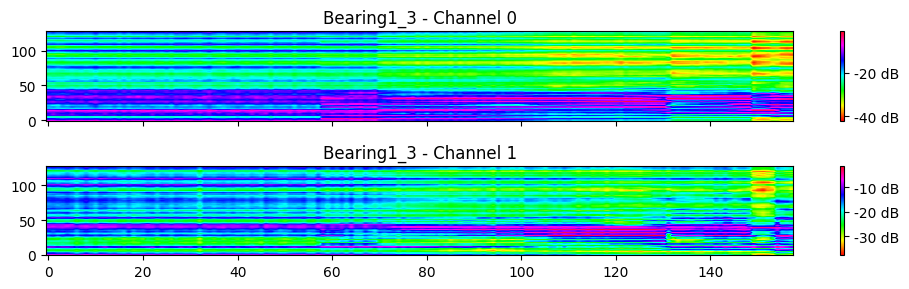

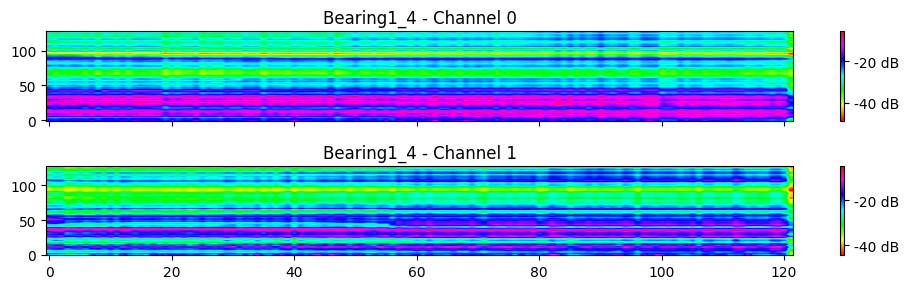

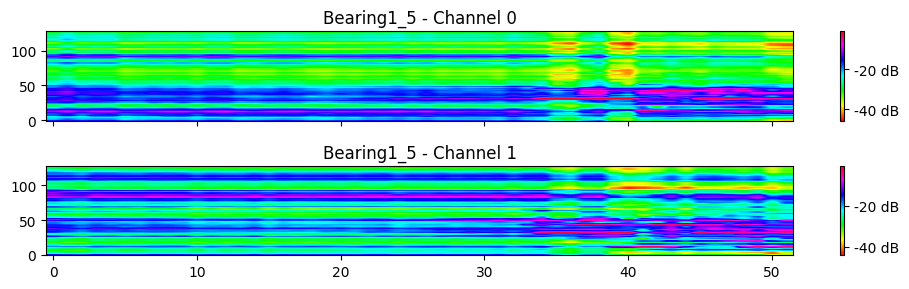

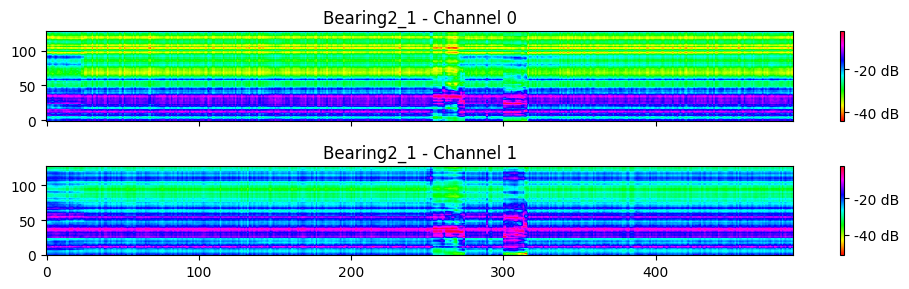

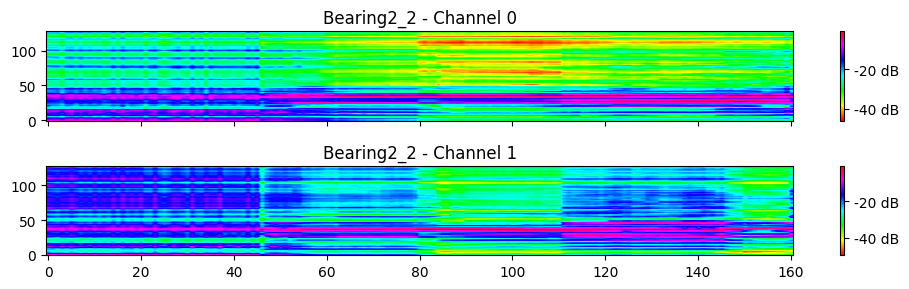

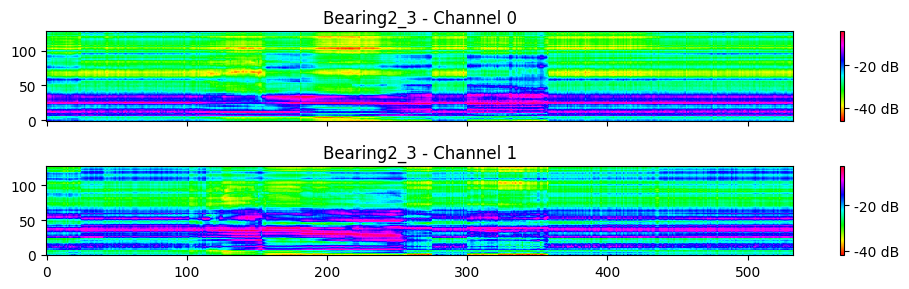

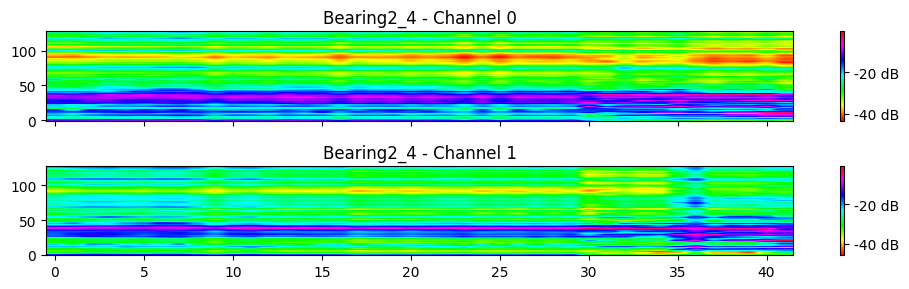

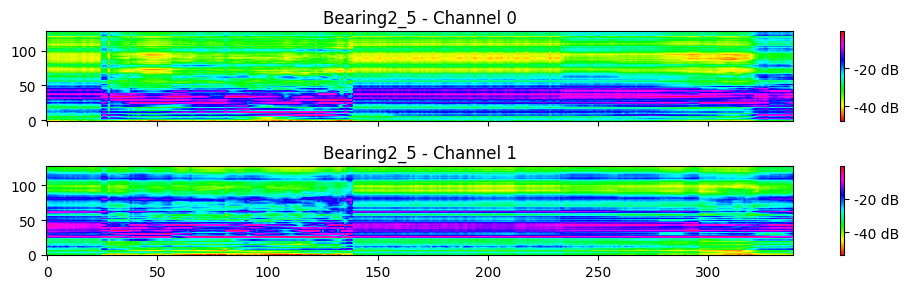

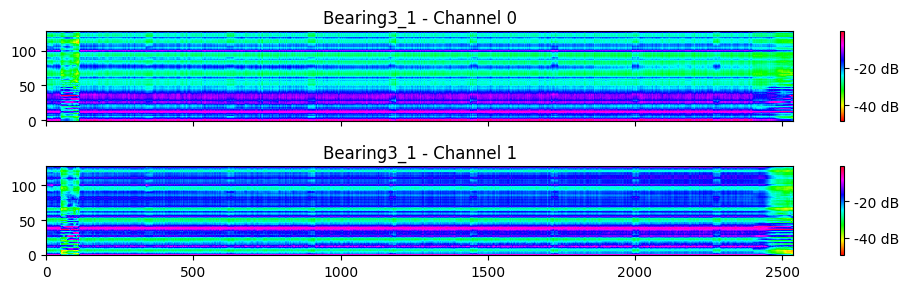

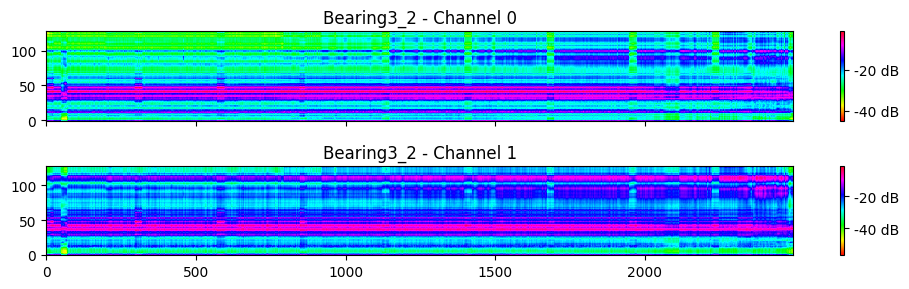

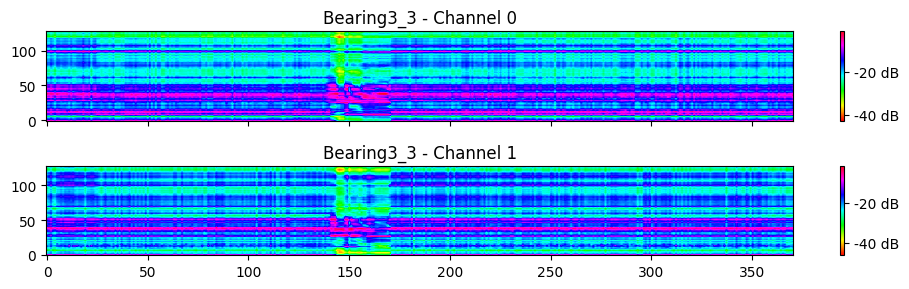

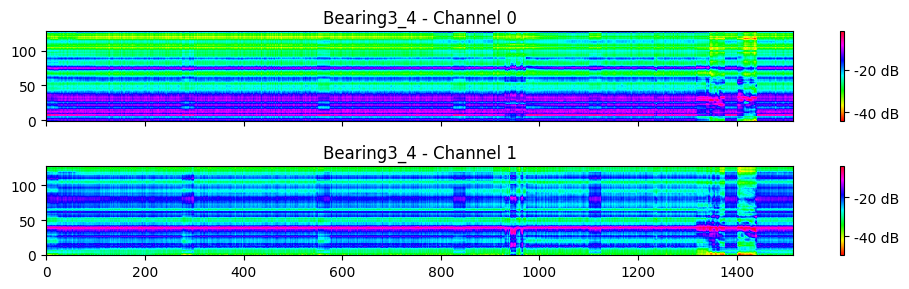

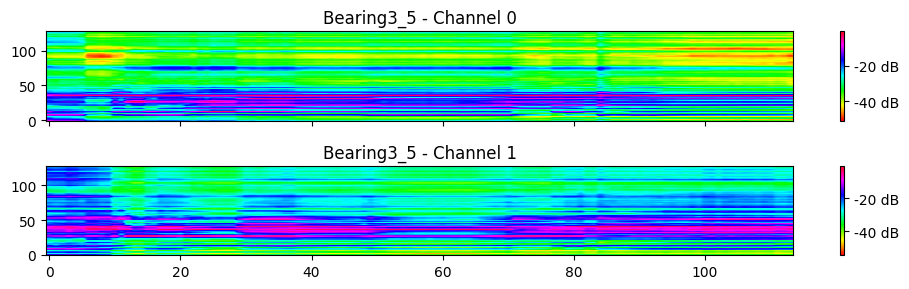

In [5]:
##### Loop through files and plot the mel spectrogram!!! ####
for fname in mel_files:
    file_path = os.path.join(mel_folder, fname)
    mel_spec_db = np.load(file_path)   # shape: (time, n_mels, 2)

    # print(f"{fname}: shape={mel_spec_db.shape}")
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 3), sharex=True)
    
    # Extract each channel as 2D array: (samples, n_melbands)
    channel_0 = mel_spec_db[:, :, 0]
    channel_1 = mel_spec_db[:, :, 1]

    img0 = axs[0].imshow(channel_0.T, aspect='auto', origin='lower', cmap='hsv')
    axs[0].set_title(f'{fname[:10]} - Channel 0')
    fig.colorbar(img0, ax=axs[0], format='%+2.0f dB')

    # Channel 1
    img1 = axs[1].imshow(channel_1.T, aspect='auto', origin='lower', cmap='hsv')
    axs[1].set_title(f'{fname[:10]} - Channel 1')
    fig.colorbar(img1, ax=axs[1], format='%+2.0f dB')

    plt.tight_layout()
    plt.show()    